<a href="https://colab.research.google.com/github/Tudped/ML_samples/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

### Data set:
UC Irvine Machine Repository [https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand]

In [ ]:
df = pd.read_csv("SeoulBikeData.csv")

In [ ]:
df.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,solar,rain,snow,seasons,holiday,functional
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
cols = ["date", "bike_count", "hour", "temperature", "humidity", "wind", "visibility", "dew_pt_temp", "solar", "rain", "snow", "seasons", "holiday", "functional"]

In [ ]:
df.columns = cols

In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         8760 non-null   object 
 1   bike_count   8760 non-null   int64  
 2   hour         8760 non-null   int64  
 3   temperature  8760 non-null   float64
 4   humidity     8760 non-null   int64  
 5   wind         8760 non-null   float64
 6   visibility   8760 non-null   int64  
 7   dew_pt_temp  8760 non-null   float64
 8   solar        8760 non-null   float64
 9   rain         8760 non-null   float64
 10  snow         8760 non-null   float64
 11  seasons      8760 non-null   object 
 12  holiday      8760 non-null   object 
 13  functional   8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [ ]:
df = df.drop(['date'], axis = 1)

In [ ]:
for label in df.columns[1:]:
  if df[label].dtype == object:
    print(label)
    print(df[label].unique())

seasons
['Winter' 'Spring' 'Summer' 'Autumn']
holiday
['No Holiday' 'Holiday']
functional
['Yes' 'No']


In [ ]:
# create dummies columns
df = pd.get_dummies(df, columns = ['holiday', 'seasons'])

In [ ]:
# drop functional column
df = df.drop(['functional'], axis=1)

In [ ]:
# filter data for bike rental at 12pm then drop hour column
df = df[df['hour']==12]
df = df.drop(['hour'], axis = 1)

In [ ]:
df.head()

,bike_count,temperature,humidity,wind,visibility,dew_pt_temp,solar,rain,snow,holiday_Holiday,holiday_No Holiday,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0,1,0,0,0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0,1,0,0,0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0,1,0,0,0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0,1,0,0,0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0,1,0,0,0,1


## Exploratory analysis

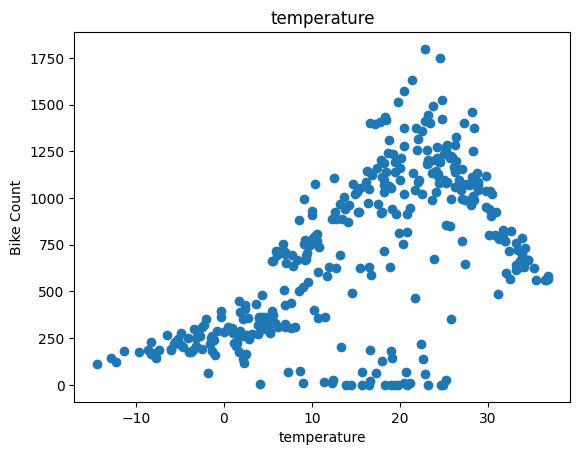

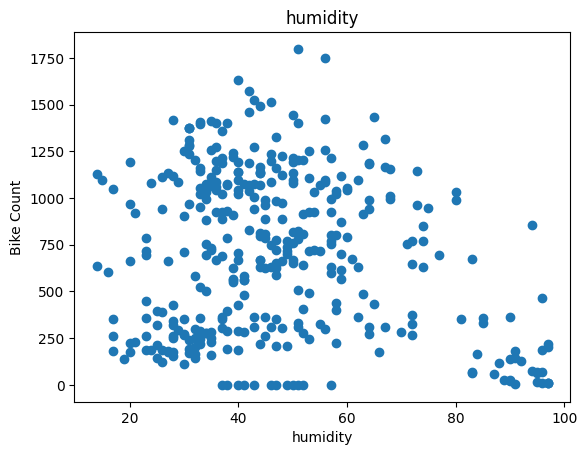

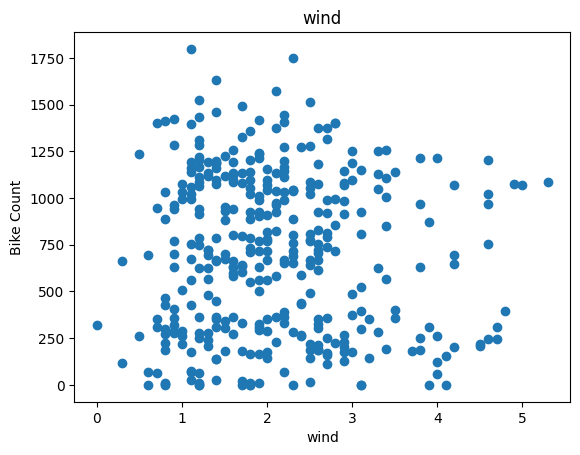

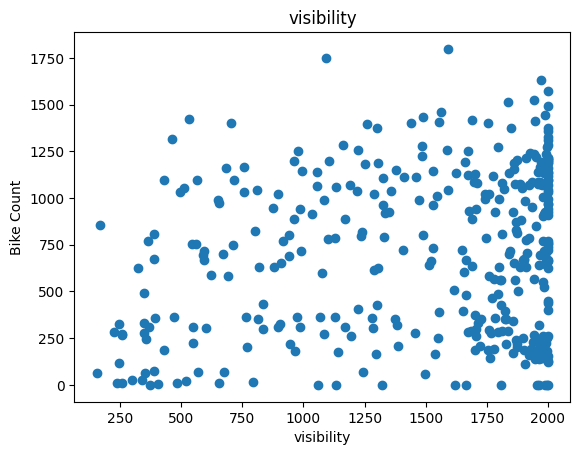

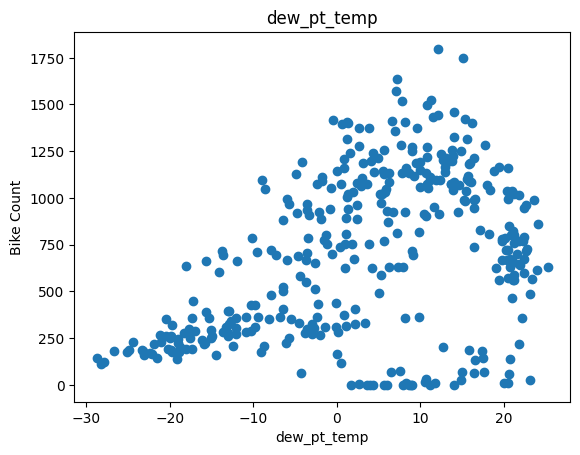

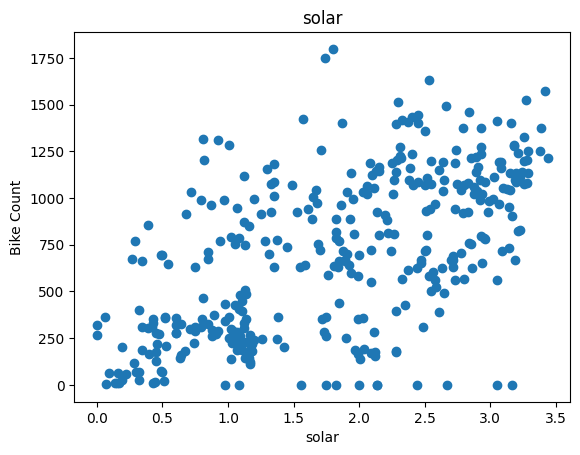

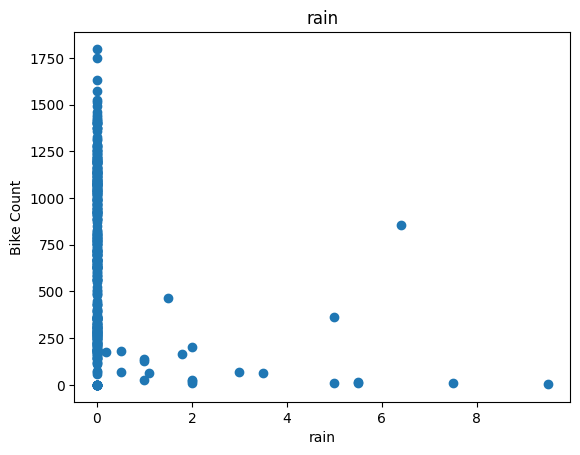

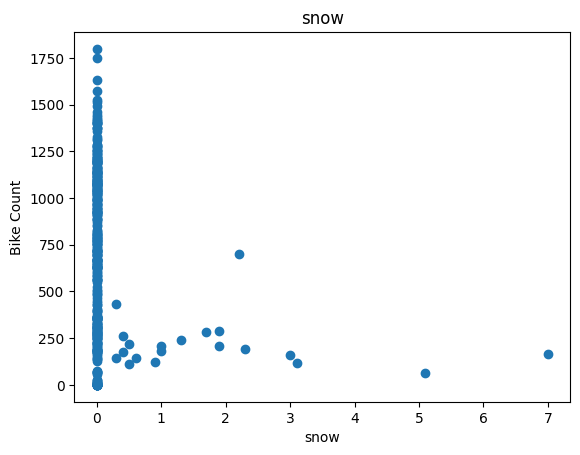

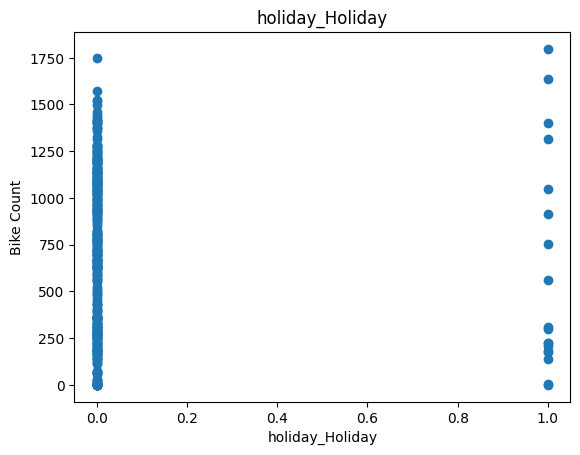

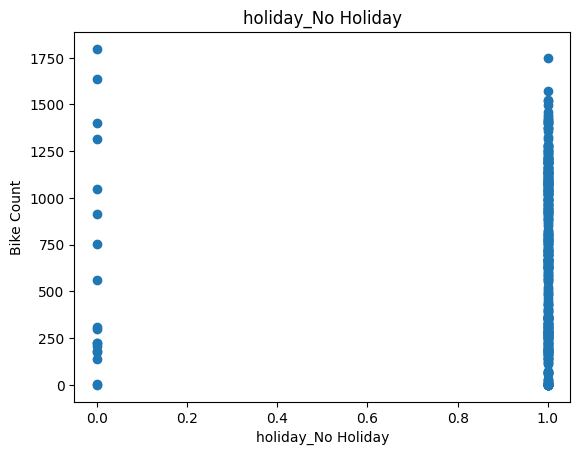

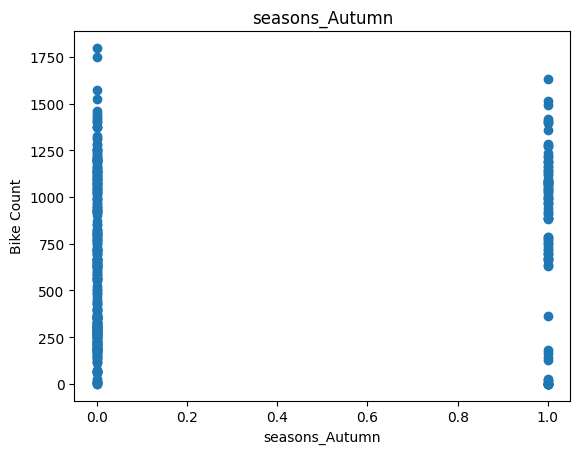

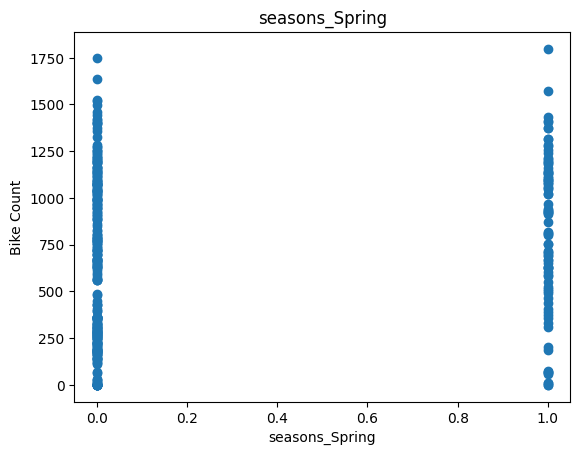

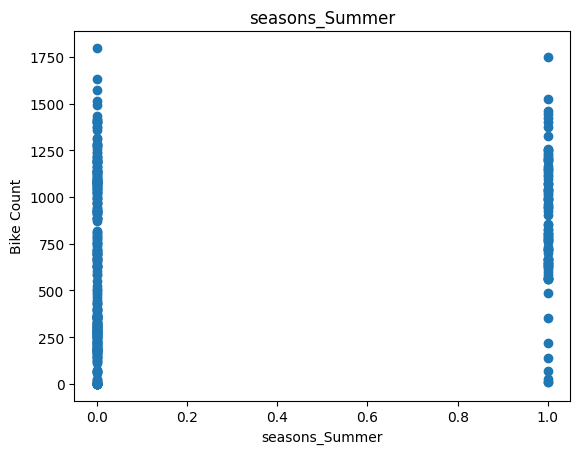

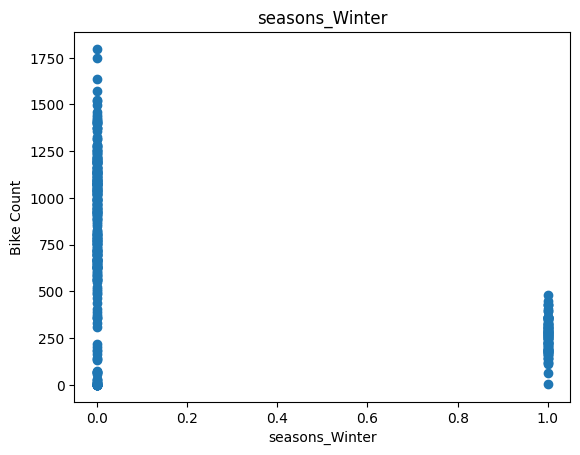

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['bike_count'])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Bike Count')
  plt.show()

## Linear Regression

In [ ]:
X = df[['temperature', 'dew_pt_temp']]
y = df['bike_count']

### Create train, test, val dataset

Train test Val function

In [ ]:
def train_test_val(X, y, ran_state):
  X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, random_state=ran_state, train_size=0.6)
  X_test, X_val, y_test, y_val = train_test_split(X_valtest, y_valtest, random_state=ran_state, train_size=0.5)

  return X_train, X_test, X_val, y_train, y_test, y_val

In [ ]:
X_train, X_test, X_val, y_train, y_test, y_val = train_test_val(X, y, 5)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_)
print(model.intercept_)

[ 45.62174097 -24.54064181]
73.54719921204992


In [ ]:
model.score(X_test, y_test)

0.3858700381571383

In [ ]:
predict = model.predict(X_val)

In [ ]:
model.score(X_val, y_val)

0.5568104777488525

In [ ]:
print("R-square: ", r2_score(y_val, predict))
print("RMSE: ", math.sqrt(mean_squared_error(y_val, predict)))
print("MAE: ", mean_absolute_error(y_val, predict))

R-square:  0.5568104777488525
RMSE:  279.23146711258164
MAE:  217.08248178082752


## Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
all_norm = tf.keras.layers.Normalization(axis=-1)
all_norm.adapt(X_train)

In [ ]:
nn_model = tf.keras.Sequential([
    all_norm,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=100
)

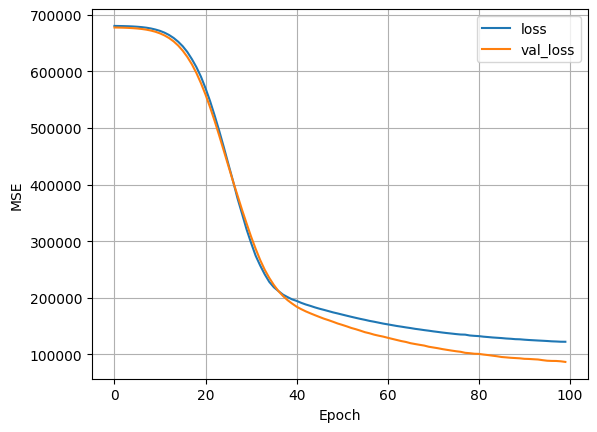

In [ ]:
plot_loss(history)

In [ ]:
pred_nn = nn_model.predict(X_val)

3/3 [==============================] - 0s 4ms/step


In [ ]:
print("RMSE Linear regression: ", math.sqrt(mean_squared_error(y_val, predict)))
print("RMSE Neural Net: ", math.sqrt(mean_squared_error(y_val, pred_nn)))

RMSE Linear regression:  279.23146711258164
RMSE Neural Net:  293.9710021055963


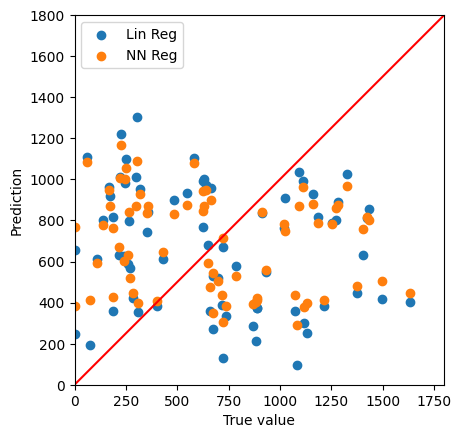

In [ ]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test, predict, label='Lin Reg')
plt.scatter(y_test, pred_nn, label='NN Reg')
plt.xlabel("True value")
plt.ylabel("Prediction")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")